# Neural Network for kids 🧒

## importing library

First Let's See how we can use library to train a simple model

In [440]:
import torch

## creating basic function

Oru problem statement is this  

`2*? = 8`

I know it's so hard but let's give our computer a hard time,cause why not ????

In [441]:
def f(w):
    return 2*w

## Let's Also Plot the Function so we can visualize all the output possiblity

C:\Users\sriram\AppData\Local\Temp\ipykernel_11460\3816062301.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  n = torch.range(-10,10)


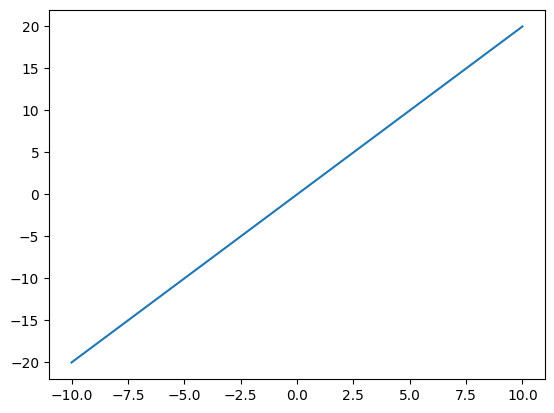

In [442]:
import matplotlib.pyplot as plt
n = torch.range(-10,10)
y = f(n)
plt.plot(n,y)

As you can See it's a linear function(it doesn't turn,just a stright line) 

You don't need to know this for now but just giving a headsup

## using with library

Let's Create a respective variables we needed

initialize them as 

W = 2

y = 8

W = weights -> which is a going to contains the answer for question mark on our problem `2*?=8` 

but for now it contains some random value like 2

y = It's going to be our output Value -> 8

In [443]:
w = torch.tensor(2.0) ; w.requires_grad=True

Now you probably thinking if you never used Torch What is `Requires_grad` means

Well this is what going to do the calculus(learning of the neural Network) behind the scene

We will see this in detail below just hang in there 

In [444]:
y = 8

Let's do the prediction 

passing the `w = 2` into our function the output should be the predicted value of our model 

as for now we didn't train our model so it's going to be random

in this case it's going to be `4`

In [445]:
pred = f(w)
pred

tensor(4., grad_fn=<MulBackward0>)

Now let's calculate the distance between our prediction and the desired output 

`8 - 4` 

Which gives the output of 

`4`

Now this is our loss value 

What is loss ??

How much our model is wrong about the data (what's the distance between the desired output and model's prediction)

In [446]:
loss = y - pred 
loss

tensor(4., grad_fn=<RsubBackward1>)

Now let's do the backward pass 

What is backward pass ?

This is where our model could figure out what are the things it needs to change to minimize the loss

(in our case it's the W value)

If you still don't know what i'm talking about it's ok it's normal trust me just again hang in there ....

it's going to get pretty clear....

In [447]:
loss.backward()

Now note here it's important 

You know that our `W` value is `2` 

but when i get the `gradient` attribute of our `W`

we get `-2` 

What ????

what is gradient ??

and where did the `-2` came from

shhhhhh.......
sh...
calm down... 

everything will be cleared.. as soon as we start break it down and build our own model

In [448]:
w.grad#for now note this value

tensor(-2.)

Now this is something really intresting 

AS you can see i'm doing lot of stuff's here 

which in neural network is called `updating the parameters`

which as you can see 
************************************************

we are getting the `w value` = 2 (w.data == just getting the data of the `w` as `int` and not as `torch.tensor` type)

************************************************

and after that we are updating the w value with some sort of formula which consist of 

`-` minus operator

`0.1` some small number(which is also called as learning rate)

`w.grad` which is a gradient(magic number for our model) = `-2`

and we will discuss this later in this notebook


In [449]:
w.data = w.data - 0.1* w.grad# for now note the w original data 2 changed into 2.2
w

tensor(2.2000, requires_grad=True)

In [450]:
pred = f(w)
pred# which indeed changes our prediction value 2*2.2 = 4.4

tensor(4.4000, grad_fn=<MulBackward0>)

In [451]:
w.data = w.data - 0.1 * w.grad
w

tensor(2.4000, requires_grad=True)

In [452]:
pred = f(w)
pred# which indeed changes our prediction value-> 2*2.4 = 4.8

tensor(4.8000, grad_fn=<MulBackward0>)

and so on , so on ... sooo onnnn 

so let's do this in for loop and let's see what is going to happen after a while 

In [453]:
#just redeclaring the w and y for convience sake
w = torch.tensor(2.0);w.requires_grad=True
y = 8

In [454]:
for _ in range(10):
    pred = f(w)
    
    loss = y-pred
    
    w.grad = None
    
    loss.backward()
    
    w.data -= 0.1 * w.grad
    
    pred = f(w)
    
    loss = y-pred
    print(f"loss is  {loss}")

loss is  3.5999999046325684
loss is  3.1999998092651367
loss is  2.799999713897705
loss is  2.3999996185302734
loss is  1.9999995231628418
loss is  1.5999994277954102
loss is  1.1999993324279785
loss is  0.7999992370605469
loss is  0.39999914169311523
loss is  -9.5367431640625e-07


wow!! holy s... ok i'm not going to say the word but do you know what happened now 

our loss is $10^-7$ (10 to the power -7) move the decimal number to 7 numbers to the right

0.00000095367....

which as you can see is really low

let's see the w value


In [455]:
w.data # it's the right answer 4 

tensor(4.0000)

In [456]:
f(w)

tensor(8.0000, grad_fn=<MulBackward0>)

yeahhiiiiiii 

🥳 wow there we go we got the right answer

bye........just kidding 

😂

more than ever now you have more questions 

I know i've been there 

so let's answer it one by one 

by building our own model

Doing By hand without any libraries

step by step and automatic 

## Step By Step

Ha here we can see there is no library just pure python codes and number's 

agian the same 

`w` `y`

In [457]:
w = 2
y = 8

In [458]:
pred=  f(w)
pred

4

In [459]:
loss = y-pred
loss

4

In [460]:
w_grad = -2# again we are getting close to finding where did this number came from......
w_grad

-2

In [461]:
w -= 0.1*w_grad
w

2.2

In [462]:
pred = f(w)
pred

4.4

just making our future self easy to calculate the loss by functionizing it  

In [463]:
def loss(y,pred):
    return y - pred

In [464]:
l = loss(y,pred)
l#it's decreasing as it should

3.5999999999999996

## automating the process again

In [465]:
def f(w):
    return 2*w

In [466]:
w = 2
y = 24
h = 0.1

In [467]:
for i in range(50):
    pred = f(w)
    w_grad = 2 * -1
    w -= h * w_grad
    pred = f(w)
    l = loss(y,pred)
    if i % 2 == 0:
        print(f"loss is  {l}")

loss is  19.6
loss is  18.799999999999997
loss is  18.0
loss is  17.199999999999996
loss is  16.4
loss is  15.599999999999996
loss is  14.799999999999995
loss is  13.999999999999995
loss is  13.199999999999994
loss is  12.399999999999993
loss is  11.599999999999993
loss is  10.799999999999992
loss is  9.999999999999991
loss is  9.19999999999999
loss is  8.39999999999999
loss is  7.599999999999991
loss is  6.799999999999994
loss is  5.9999999999999964
loss is  5.199999999999999
loss is  4.400000000000002
loss is  3.600000000000005
loss is  2.800000000000008
loss is  2.0000000000000107
loss is  1.2000000000000135
loss is  0.40000000000001634


In [468]:
w

11.999999999999991

In [469]:
pred = f(w)
pred

23.999999999999982

Ok we did the same thing without any libraries by just using pure python coding and the output we got is again the correct one

24

but now at this point you probabily have two question 

one is 

`what is this -2 number where did this came from (calculus)`

and

`how is the w value increasing to the right amount`

let's look at the first question with a problem called 

`finding the gradient`

## the calculas behind the scene 

what is the gradient 

well first let me show you where i learn't it when i started this pet project 

[click me](https://www.youtube.com/watch?v=-ktrtzYVk_I&list=PL3j1ntBPCU_om5O1RBi5-vDRwVTvDwyeV&ab_channel=NancyPi)

which is explained by an angel (i mean literaly she is so beautifull😙) sorry for perving out 

but i'm not kidding she will explain every concept so easily and intrestingly enough that you will never forget

but if you want the summary of the information

`gradient is like the growing factor of a given function`

In [470]:
# let's break that sentence down

#let's take the example of 2*2 our problem statement
x = 2
w = 2
pred = x*w
pred
# now i have a question for you how much does the pred change if i increase the w  

4

In [471]:
#let's see it in action
x = 2
w = 3
pred = x*w
pred # whoa it's changed two time the previous value don't trust me 

6

In [472]:
# here is the proff
6-4

2

In [473]:
# again changing the w 
x = 2
w = 4
pred = x*w
pred# again the same two times the previous value

8

In [474]:
# here is the proff
8-6

2

### but what if i changed the x value a little bit and increased the w value 

In [475]:
x = 3#changed the x => 2 -> 3
w = 2# is same
pred_1 = x*w

w = 3#changed from w=> 2 -> 3 
pred_2 = x*w

w = 4# changed again
pred_3 = x*w

#printing the output
print(pred_1,pred_2,pred_3)

6 9 12


In [476]:
# now the difference 
9-6,12-9# no wonder it's rate of change is 3 times 

(3, 3)

So at this point you got the idea that 

if i changed `w` it's going to increase the prediction value in a rate of `x` times

## And Gentlemens and ladies this is what called gradient value

which is saying that what is a amount of change occur in a prediction if i change the `w` 

the answer is `x`

that's the amount of change going to happen

**that's the derivative of the multiplication function**

and the gradient is the `x` value

at first problem we had `x` value has `2`

so there our `w` gradient value is `2`

and now we changed our `x` value into `3`

now the gradient value for `w` is `3`

### so now we know what is the derivative of our multiplicative function is 

pred = x*w

with respective w (if i change w in a slight way how much it's going to change the pred value)

answer is :-> x (amount)

and yes viseversa

pred = x*w

with respective x (if i change x in a slight way how much it's going to change the pred value)

answer is :-> w (amount)

In [477]:
#let's call our derivative of the w (dw)
x = 2
w = 2
y = 8 
dw = x
dw#the gradient value is 2

2

### ok until now we got the gradient value has 2 

but if you can recall we had a -2 has a gradient before

so let's find our where we got the `-` symbol

In [478]:
#let's check how much does the loss change with repective w

x = 2
w = 2
dw = x
y = 8
pred = x*w
print(f"the prediction value before changing the w: {pred}")
print(f"the loss value before changing w: {loss(y,pred)}")


w = 3 
pred = x*w
print(f"the prediction value after changing the w: {pred}")
print(f"the loss value after changing the w : {loss(y,pred)}")


the prediction value before changing the w: 4
the loss value before changing w: 4
the prediction value after changing the w: 6
the loss value after changing the w : 2


we know why we got the prediction->6 

but what about loss->2

so turn's out that our loss contain the formula of 

`y-pred` -> (8-4)

which has minus value 

so what ever value your going to give to the pred it's value is going to change in - value because again we are reducing from 8

so with respective to minus operator 

we will get -1 

and for plus operator we get the opposite as you may already guessed it 

+1

In [479]:
w = 2
y = 8
l = y - w
l

6

In [480]:
w = 3 
y = 8
l = y-w
l

5

In [481]:
w = 4#it's dw value is 0 (because it's just a constant it's not going to change with it's input)
y = 8
l = y-w
l

4

You get the idea 

but we also have a x (you can see in the above example we didn't take the prediction formula x*w)

we know that our w has a dw which is 2 

so now we use chain rule which is (chain rule = multiplying the current gradient value to the previous gradient)

dl*dw (here dl = l derivative)

In [482]:
# now with repective w 
dl = -1
dw = 2 * dl
dw

-2

yeahhhhhh .... 🥳
and that's the gradient and calculas part of the neural network

the fundamentals are not gonna change

and this is the fundamentals 🥳

if you want to understand it with more example i highly recommed you watch the angel(🥰😇) video

In summary

`loss = y - pred` 

dl/dl = -1

`pred = x*w`

dl/dx = w

dl/dw = x

### now you have second question 

updation 

w = 2

x = 2 

dw = x

`w = w - 0.1 * dw`

**************************************

For this you need to understand what does the gradient value tell's us 

let's take this example

In [483]:
w = 2
x = 2
pred = x*w
l = loss(y,pred)
dl = -1
dw = x * dl
l

4

#### now our gradient value dw=-2 is telling us if we decrease the w value by 2 

we increase the loss (but we don't want to increase the loss we decrease the loss for getting the correct answer)

so  we increase the w value by 2 

(generalizing the formula would be 

`w = w - (-w_grad)`
 
 which would increase and and if we got plus gradient value 
 
 `w = w - (w_grad)` 
 
 it would decrease the w as we want to) 

In [484]:
w = w - dw # note here we didn't use the small value 0.1
w 

4

Great here we go the 4 with just one step of running the code (we didn't use the for loop like before)

so why do we need to use the small value if we can do this in this way easily 

for that let's take the another example

In [485]:
x = 2 
w = 2
y = 10

pred = f(w)
l = loss(y,pred)

dl = -1
dw = x * dl

print(f"loss is : {l}")

loss is : 6


In [486]:
w = w - dw

pred = f(w)
l = loss(y,pred)

print(f"loss is : {l}")

loss is : 2


In [487]:
w = w - dw

pred = f(w)
l = loss(y,pred)

print(f"loss is : {l}")

loss is : -2


Here in this example as you can see it's overshooting the loss 

which means

the w value is going to go larger than what we want it to be


In [488]:
w # but we know that 2 * 5  = 10 and not 2 * 6 = 10

6

so if we decrease the the w value with small amount of gradient at a step we would converge to the loss smoothly and preciesly

In [489]:
x = 2 
w = 2
y = 10

pred = f(w)
l = loss(y,pred)

dl = -1
dw = x * dl

print(f"loss is : {l}")

loss is : 6


In [490]:
w = w - 0.1*dw

pred = f(w)
l = loss(y,pred)

print(f"loss is : {l}")

loss is : 5.6


In [491]:
w = w - 0.1*dw

pred = f(w)
l = loss(y,pred)

print(f"loss is : {l}")

loss is : 5.199999999999999


In [492]:
w = w - 0.1*dw

pred = f(w)
l = loss(y,pred)

print(f"loss is : {l}")

loss is : 4.799999999999999


You get the idea let's for loop the shit out of this...

In [493]:
for _ in range(10):# this 10 is also called epochs value (eg: epochs value for this model is 10)
    w = w - 0.1*dw
    pred = f(w)
    l = loss(y,pred)

    print(f"loss is : {l}")

loss is : 4.399999999999999
loss is : 3.9999999999999982
loss is : 3.599999999999998
loss is : 3.1999999999999975
loss is : 2.799999999999997
loss is : 2.399999999999997
loss is : 1.9999999999999964
loss is : 1.599999999999996
loss is : 1.1999999999999957
loss is : 0.7999999999999954


In [494]:
w,round(w)#normal w value and rounded of w value

(4.600000000000002, 5)

Yes it would take lot of time and iteration to converge but heyyyy it's atleast precise

Now You aldready understand the basics of Neural Network

But let's sum this up

***************************************
W = 2 # which is called weight's (our model is going to change this)

x = 2 #our original value (we can't change this)

y = 8 # our Desired output

lr = 0.1 # to slow down the process of updating to make it precise (learning rate)

pred = x * w # simple linear function 

loss = y - pred # our loss (distance between the desired output and prediction)

dl = -1 # the gradient for our loss function

dw = x * dl # the gradient for our Weights with chain rule 
***********************************

## Fully put together with full Automation

In [495]:
def f(w):
    return x*w

### change the y value as greater or as much as you want our AI model is going to predict the right W value for that (keep the y value with a divisible of 2 to get pretty accurate answer)

In [496]:
w = 1
x = 2
x = 2
y = 324 # change the output if you want in a positive direction to any number you want
lr = 0.1
i = 0
l = loss(y,f(w))
print(l)
while l>0.1:
    
    i+=1
    #forward pass
    pred = f(w)
    
    l = loss(y,pred)
    
    if i % 10 == 0:
        print("loss is : ",l)
        
    #backward pass 
    w_grad = 2 * -1
    
    #updating the w value
    w -= lr * w_grad

322
loss is :  318.4
loss is :  314.4
loss is :  310.4
loss is :  306.4
loss is :  302.40000000000003
loss is :  298.40000000000003
loss is :  294.40000000000003
loss is :  290.40000000000003
loss is :  286.4000000000001
loss is :  282.4000000000001
loss is :  278.4000000000001
loss is :  274.4000000000001
loss is :  270.40000000000015
loss is :  266.40000000000015
loss is :  262.40000000000015
loss is :  258.40000000000015
loss is :  254.4000000000001
loss is :  250.40000000000003
loss is :  246.39999999999998
loss is :  242.39999999999992
loss is :  238.39999999999986
loss is :  234.3999999999998
loss is :  230.39999999999975
loss is :  226.3999999999997
loss is :  222.39999999999964
loss is :  218.39999999999958
loss is :  214.39999999999952
loss is :  210.39999999999947
loss is :  206.3999999999994
loss is :  202.39999999999935
loss is :  198.3999999999993
loss is :  194.39999999999924
loss is :  190.39999999999918
loss is :  186.39999999999912
loss is :  182.39999999999907
loss is

In [497]:
w

162.19999999999933

In [498]:
round(f(w))# 

324

That's it you Now fully know What is happening inside the neural network while it's training 

Now if you want to challenge yourself to understand even further just look down bellow 

Warning : If you didn't understand the above part clearly enough (I highly recommend Watching my beloved Angel Tutorial and then come back after you understand the above part >>>*all the best*<<<)

## Big one (with real problem)

W :-> just a random values for w but this time it contain 3 rows and 3 columns number

In [499]:
w = torch.randn((3,3),requires_grad=True)
w# again it's random numbers in normal distribution(bell curve distribution)

tensor([[-0.2151,  1.0744, -1.3856],
        [ 1.2338,  0.3470, -0.5861],
        [ 0.8782, -0.6359,  0.9050]], requires_grad=True)

In [500]:
x = torch.tensor([2,4,6],dtype=torch.float32)
y = torch.tensor([4,8,12],requires_grad=True,dtype=torch.float32)
def f(w,x):
    return x@w

### Loss Function

Here as you can see our loss function is some what complecated but not really if you break it down 

it's `mean squared error` 

which means 

$adding((y - pred)^2)/len(y)$

squaring the distance so we don't get negative value as a loss 


****************************
So let's break it down 

1. orginal = y -> y_shape->3

2. prediction = x@w -> matrix multiplication x_shape->[3],w_shape->[3,3]

3. diff = orginal - prediction

4. diff_2 = diff ** 2 -> squaring (just like in the formula)

5. sum_dif = suming over(diff_2) again adding the squared differences

6. l = len(orginal)**-1 -> which is also represented as ->`1/len(orginal)`

7. f_l = l * sum_diff -> which is also represented as `sum_diff/len(orginal)`

In [501]:
#Loss
org = y
pred = f(w,x)
diff = org - pred
diff_2 = diff**2
sum_dif = sum(diff_2) 
l = torch.tensor(len(org)**-1,requires_grad=True)
f_l = l*sum_dif
f_l

tensor(79.4787, grad_fn=<MulBackward0>)

Why do we have to break down the formula like this 

because it's easy to do the `gradient finding` step when we break it down like this compared to the whole formula 

### We are telling the pytorch to keep the gradient so we can access it globaly

In [502]:
p = [f_l,l,sum_dif,diff_2,diff,org,pred]
for i in p:
    i.retain_grad()
    print(i)

tensor(79.4787, grad_fn=<MulBackward0>)
tensor(0.3333, requires_grad=True)
tensor(238.4360, grad_fn=<AddBackward0>)
tensor([ 33.3425,  68.5309, 136.5625], grad_fn=<PowBackward0>)
tensor([-5.7743,  8.2783, 11.6860], grad_fn=<SubBackward0>)
tensor([ 4.,  8., 12.], requires_grad=True)
tensor([ 9.7743, -0.2783,  0.3140], grad_fn=<SqueezeBackward3>)


We are doing this step to make the torch library to also calculate the gradient and store it in the grad variable so we can check with our own finding and the library finding and see if it both match

### functionizing our loss (mean squared Error)

In [503]:
def loss(y,pred):
    org = y.clone().detach()
    diff = org - pred
    diff_2 = diff**2
    sum_dif = sum(diff_2) 
    l = torch.tensor(len(org)**-1,requires_grad=True)
    f_l = l*sum_dif
    return f_l

### Calling backward on the full_loss(f_l) to get the gradient for each value's in the code

In [504]:
f_l.backward()

In [505]:
# we need to have this so we can check whether we got the right gradient by using our manual backpropagation
w.grad

tensor([[  7.6991, -11.0378, -15.5813],
        [ 15.3981, -22.0756, -31.1627],
        [ 23.0972, -33.1134, -46.7440]])

### finding the Gradients manually now

If you know the power rule which i didn't cover it in this examples...

then you can understand the whole thing without any problem 

in brief 

if we have the power 

$2^3$

the gradient value is 

$3*2^2$

and another example 

$2^4$ -> $4*2^3$

in general 

$x^n$ -> $n*x^(n-1)$

While finding the gradient like this we have to make sure that shape match with the actual value 

In [506]:
f_l.shape# it has zero dimention(shape) which means it contains only one value
f_l

tensor(79.4787, grad_fn=<MulBackward0>)

In [507]:
l.shape# same it has zero dimention
l

tensor(0.3333, requires_grad=True)

In [508]:
sum_dif.shape# same
sum_dif

tensor(238.4360, grad_fn=<AddBackward0>)

In [509]:
diff_2.shape# here we can see the shape/size is 3
diff_2

tensor([ 33.3425,  68.5309, 136.5625], grad_fn=<PowBackward0>)

In [510]:
diff.shape # this shape is also three values
# diff

torch.Size([3])

In [511]:
pred.shape#same here 3 values
w.shape# and this value contain 2 dimention (rows,columns)

torch.Size([3, 3])

so the matching gradient is also supposed to have that much gradient values 

In [512]:
#going from f_l -> w to find the final W_grad 
org = y
pred = x @ w
diff = org - pred
diff_2 = diff**2
sum_dif = sum(diff_2) 
l = torch.tensor(len(org)**-1,requires_grad=True)
f_l = l*sum_dif
f_l

tensor(79.4787, grad_fn=<MulBackward0>)

In [513]:
#starting from the start f_l
f_l_grad = 1
l_grad = sum_dif * f_l_grad
sum_dif_grad = l * f_l_grad
diff_2_grad = torch.ones(diff_2.shape) * sum_dif_grad
diff_grad = (2*diff)* diff_2_grad
pred_grad = -1* diff_grad
#ended with w (also used chain rule as you can see here)
w_grad = (torch.ones(w.shape)*x).T *pred_grad
w_grad

tensor([[  7.6991, -11.0378, -15.5813],
        [ 15.3981, -22.0756, -31.1627],
        [ 23.0972, -33.1134, -46.7440]], grad_fn=<MulBackward0>)

In [514]:
l_grad.shape#just like l it has no size which means it has no dimention only one value
# l_grad # just uncomment this to check it out  

torch.Size([])

In [515]:
pred_grad.shape#just like the pred_grad it has 3 shape/size 
# pred_grad # just uncomment this to check it out 

torch.Size([3])

In [516]:
w_grad.shape #just like w it has shape of 3,3 which is (rows,columns)

torch.Size([3, 3])

### intializing the Weights 

In [517]:
w = torch.randn((3,3),requires_grad=True)
x = torch.tensor([2,4,6],dtype=torch.float32)
y = torch.tensor([8,10,12])
def f(w,x):
    return x@w

### Training the model 

In [518]:
for i in range(900):
    #forward pass
    pred = f(w,x)

    #loss function mse
    org = y.clone().detach()
    pred = f(w,x)
    diff = org - pred
    diff_2 = diff**2
    sum_dif = sum(diff_2) 
    l = torch.tensor(len(org)**-1,requires_grad=True)
    f_l = l*sum_dif

    #backward pass ----
    
    #backward/chain rule
    f_l_grad = 1
    l_grad = sum_dif * f_l_grad
    sum_dif_grad = l * f_l_grad
    diff_2_grad = torch.ones(diff_2.shape) * sum_dif_grad
    diff_grad = (2*diff)* diff_2_grad
    pred_grad = -1* diff_grad
    w_grad = (torch.ones(w.shape)*x).T *pred_grad
    
    ##updating
    lr = 0.001 if l >=6.0 else 0.0001
    w.data -= lr * w_grad
    #-----------
    
    #calculating the loss
    pred = f(w,x)
    l = loss(y,pred)
    if i % 100 == 0:
        print(f"loss : {l}")

loss : 191.09176635742188
loss : 90.44029998779297
loss : 42.80375289916992
loss : 20.25824737548828
loss : 9.587871551513672
loss : 4.537772178649902
loss : 2.1476447582244873
loss : 1.0164430141448975
loss : 0.48106202483177185


### Checking the outputs

In [519]:
f(w,x),y # agian it's not precise but it's way close if you round every value in f(w,x)

(tensor([ 7.4748,  9.6214, 11.4814], grad_fn=<SqueezeBackward3>),
 tensor([ 8, 10, 12]))

In [520]:
p = f(w,x)
torch.round(p.data)# as i said it's founded by the computer(not by us 🤯)

tensor([ 7., 10., 11.])

### Checking the weights 

In [521]:
w # it's some patterns that we don't have to care about (it's our model learn't pattern for our data)

tensor([[ 1.0233, -0.4248,  0.1876],
        [-0.1255,  0.4546,  0.6322],
        [ 0.9884,  1.4421,  1.4296]], requires_grad=True)

## Let's do this with Torch (so we can appericate the library even better)

In [522]:
w = torch.randn((3,3),requires_grad=True)
x = torch.tensor([2,4,6],dtype=torch.float32)
y = torch.tensor([4,8,12])
def f(w,x):
    return x@w

In [523]:
for _ in range(8):
    
    #forward pass
    pred =f(w,x)
    l = loss(y,pred)

    #gradient
    l.backward()#that's it 😂

    #updating
    if l >= 0.6:
        w.data -= 0.001 * w.grad
    else:
        w.data -= 0.00001 * w.grad

    #calculating loss
    pred =f(w,x)
    l = loss(y,pred)
    print(f"the loss is : {l}")

the loss is : 73.54881286621094
the loss is : 62.778648376464844
the loss is : 48.646888732910156
the loss is : 33.244178771972656
the loss is : 18.84918212890625
the loss is : 7.5915045738220215
the loss is : 1.1365878582000732
the loss is : 0.43937358260154724


In [524]:
f(w,x),y

(tensor([ 4.5225,  8.3340, 12.9662], grad_fn=<SqueezeBackward3>),
 tensor([ 4,  8, 12]))

In [525]:
w# unlike the w we used in the above example which has one value 4 here it has 3,3 -> 6 values 
#to represent that 3 outputs

tensor([[-1.0398,  0.0924,  0.4084],
        [-0.5070,  0.5175,  1.0363],
        [ 1.4383,  1.0132,  1.3340]], requires_grad=True)

## Transfer Learning Basic

Now if we saved this w in a text document or like a file format

So if we opened our model next time we could just load this weights saved file and use that weight's to show the model output

without Even have to Train the model from scratch 

This is called Transfer Learning (Pretrained Model)

In [526]:
x@w # transfer learning

tensor([ 4.5225,  8.3340, 12.9662], grad_fn=<SqueezeBackward3>)

Now you can confidently say that you created AI from scratch which can learn to predict the correct multiplicative term for the given output🥳🥳🐱‍💻🐱‍🐉🐱‍🐉

## Thankyou For your Time 🐒

I REALLY APPRECIATE IT 😊
